
## Linear Regression with Multiple Regressors


Each month the Bureau of Labor Statistics in the U.S. Department of Labor
conducts the “Current Population Survey” (CPS), which provides data on labor force
characteristics of the population, including the level of employment, unemployment, and
earnings. 

https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/CPS12_Description.pdf



### Data source

http://wps.aw.com/aw_stock_ie_3/246/63148/16166073.cw/index.html

http://wps.aw.com/aw_stock_ie_3/246/63148/16166072.cw/content/index.html

https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/Stock-Watson-EmpiricalExercises-DataSets.htm

http://fmwww.bc.edu/ec-p/data/stockwatson/datasets.list.html



In [19]:
# The easiest way to get haven is to install the whole tidyverse:
#install.packages("tidyverse")

# Alternatively, install just haven:
#install.packages("haven")

#install.packages("visreg", repos = "http://cran.rstudio.com")

library(haven)
library(dplyr)
library(visreg)

Installing package into 'C:/Users/oldyu/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'visreg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\RtmpQjnPtG\downloaded_packages


In [35]:

cps12 <- read_stata("http://wps.aw.com/wps/media/objects/11422/11696965/data3eu/cps12.dta")

In [36]:
glimpse(cps12)

Observations: 7,440
Variables: 5
$ year     <dbl> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012...
$ ahe      <dbl> 19.230770, 17.548077, 8.547009, 16.826923, 16.346153, 16.1...
$ bachelor <dbl> 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...
$ female   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1...
$ age      <dbl> 30, 29, 27, 25, 27, 30, 31, 29, 29, 33, 27, 28, 30, 31, 34...


In [38]:
fit1=lm(log(ahe) ~ ., data=cps12)
fit2=lm(log(ahe) ~ log(age)+female+bachelor, data=cps12)
fit3 = lm(log(ahe) ~  age+ I(age^2) +female+bachelor, data=cps12)


In [39]:
summary(fit2)


Call:
lm(formula = log(ahe) ~ log(age) + female + bachelor, data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27827 -0.28691  0.01326  0.30992  1.85737 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14953    0.19436   0.769    0.442    
log(age)     0.75294    0.05734  13.132   <2e-16 ***
female      -0.19236    0.01134 -16.957   <2e-16 ***
bachelor     0.43766    0.01123  38.957   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4782 on 7436 degrees of freedom
Multiple R-squared:  0.1966,	Adjusted R-squared:  0.1962 
F-statistic: 606.4 on 3 and 7436 DF,  p-value: < 2.2e-16


In [40]:
summary(fit3)


Call:
lm(formula = log(ahe) ~ age + I(age^2) + female + bachelor, data = cps12)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26705 -0.28919  0.01526  0.31090  1.85221 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7918819  0.6699502   1.182   0.2372    
age          0.1040449  0.0456313   2.280   0.0226 *  
I(age^2)    -0.0013284  0.0007712  -1.722   0.0850 .  
female      -0.1923983  0.0113436 -16.961   <2e-16 ***
bachelor     0.4374121  0.0112363  38.928   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4782 on 7435 degrees of freedom
Multiple R-squared:  0.1967,	Adjusted R-squared:  0.1963 
F-statistic: 455.2 on 4 and 7435 DF,  p-value: < 2.2e-16


In [6]:
cps8chap <- read_stata("http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/datasets3e/datasets/ch8_cps.dta")

In [8]:
glimpse(cps8chap)

Observations: 63,195
Variables: 8
$ ahe       <dbl> 13.07692, 38.46154, 62.39316, 21.36752, 15.68627, 22.5961...
$ yrseduc   <dbl> 13, 18, 12, 18, 14, 13, 13, 12, 14, 16, 16, 16, 14, 14, 1...
$ female    <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...
$ age       <dbl> 56, 59, 52, 38, 38, 41, 42, 48, 42, 51, 49, 33, 52, 55, 5...
$ northeast <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ midwest   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ south     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ west      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


In [9]:

cps08 <- read_stata("http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/empirical/empex_tb/cps08.dta")

In [10]:
glimpse(cps08)

Observations: 7,711
Variables: 5
$ ahe      <dbl> 38.461540, 12.500000, 9.857142, 8.241758, 17.788462, 10.09...
$ year     <dbl> 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008...
$ bachelor <dbl> 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1...
$ female   <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1...
$ age      <dbl> 33, 31, 30, 30, 31, 29, 26, 28, 30, 25, 26, 25, 30, 31, 32...


In [33]:
summary(fit3)


Call:
lm(formula = log(ahe) ~ age + I(age^2) + female + bachelor, data = cps08)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34922 -0.27960  0.02046  0.30927  1.66268 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.0854298  0.6382725   1.701   0.0891 .  
age          0.0813725  0.0434864   1.871   0.0614 .  
I(age^2)    -0.0009148  0.0007354  -1.244   0.2135    
female      -0.1858687  0.0109006 -17.051   <2e-16 ***
bachelor     0.4283780  0.0108057  39.644   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4694 on 7706 degrees of freedom
Multiple R-squared:  0.2008,	Adjusted R-squared:  0.2004 
F-statistic: 484.1 on 4 and 7706 DF,  p-value: < 2.2e-16


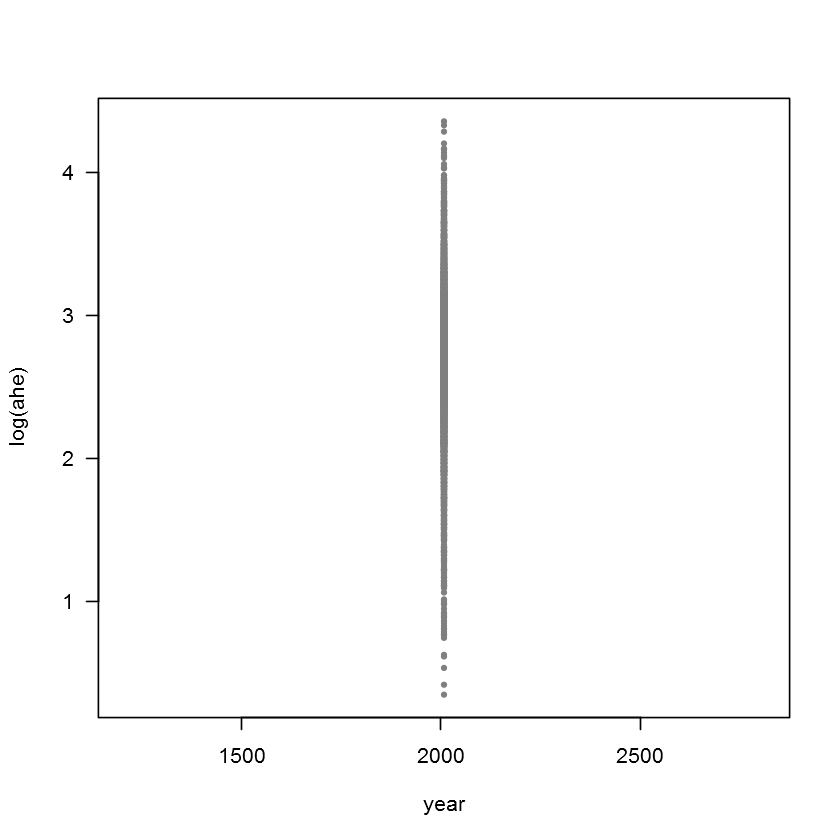

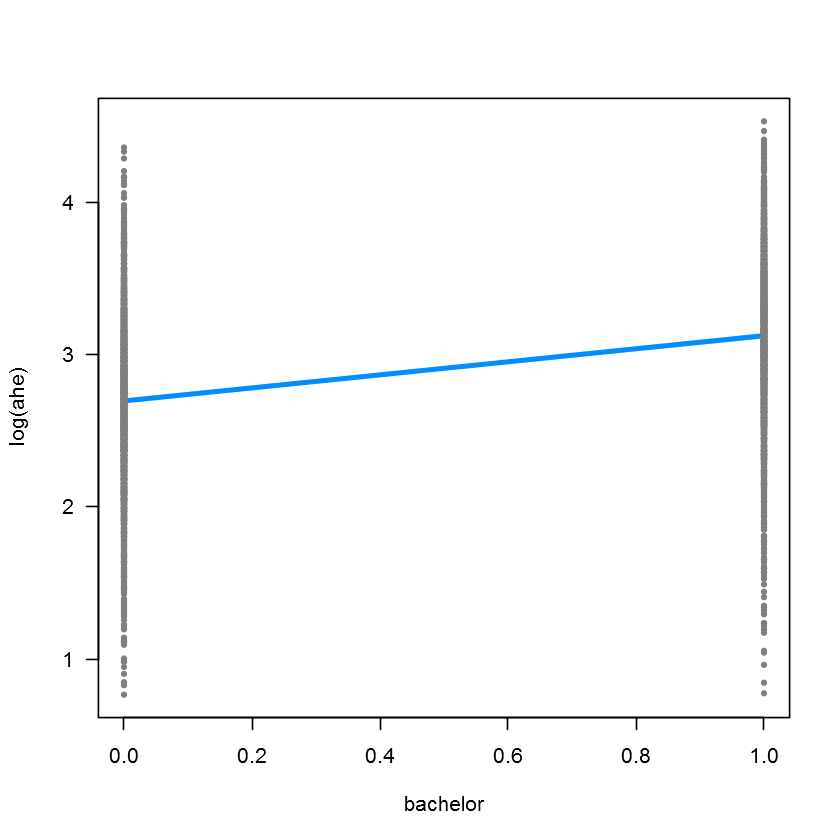

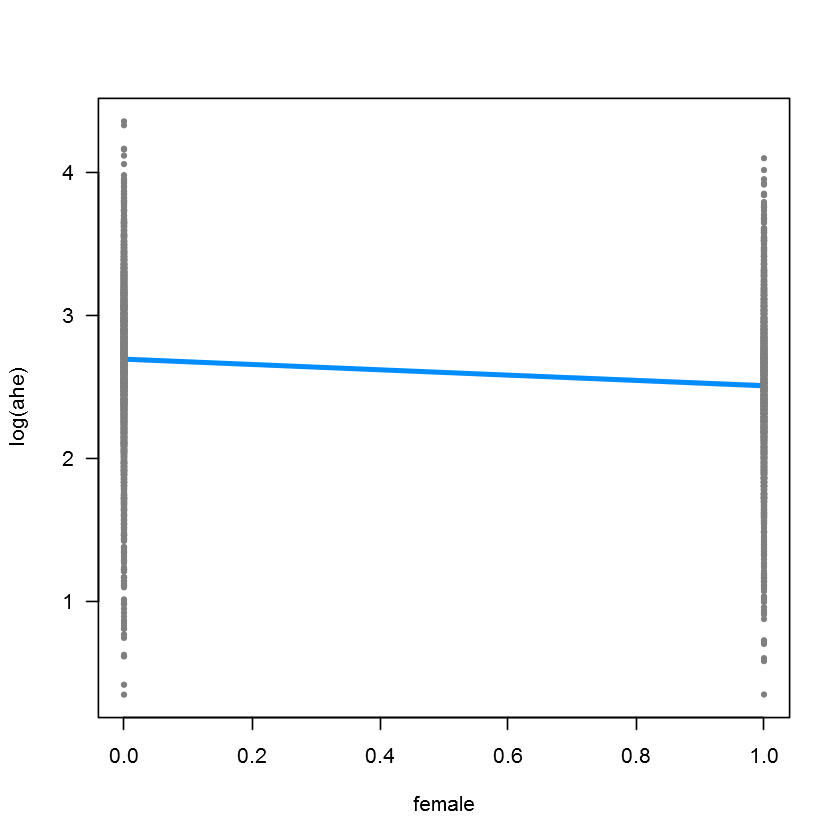

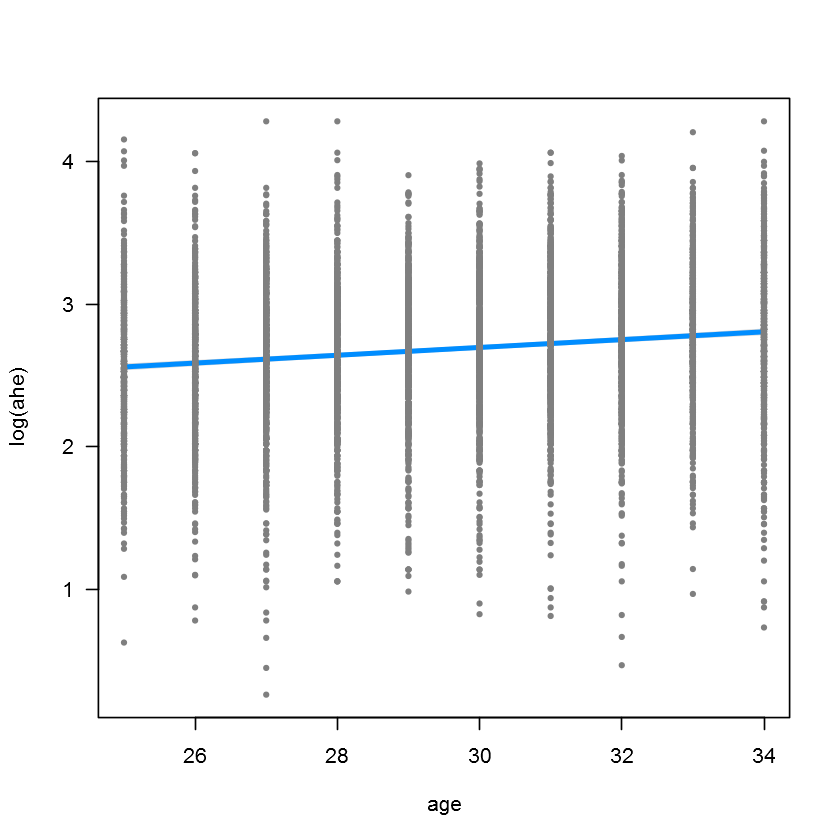

In [23]:
visreg(fit1)

Warning message in Terms(fit, f, x, trans, alpha, ...):
"prediction from a rank-deficient fit may be misleading"

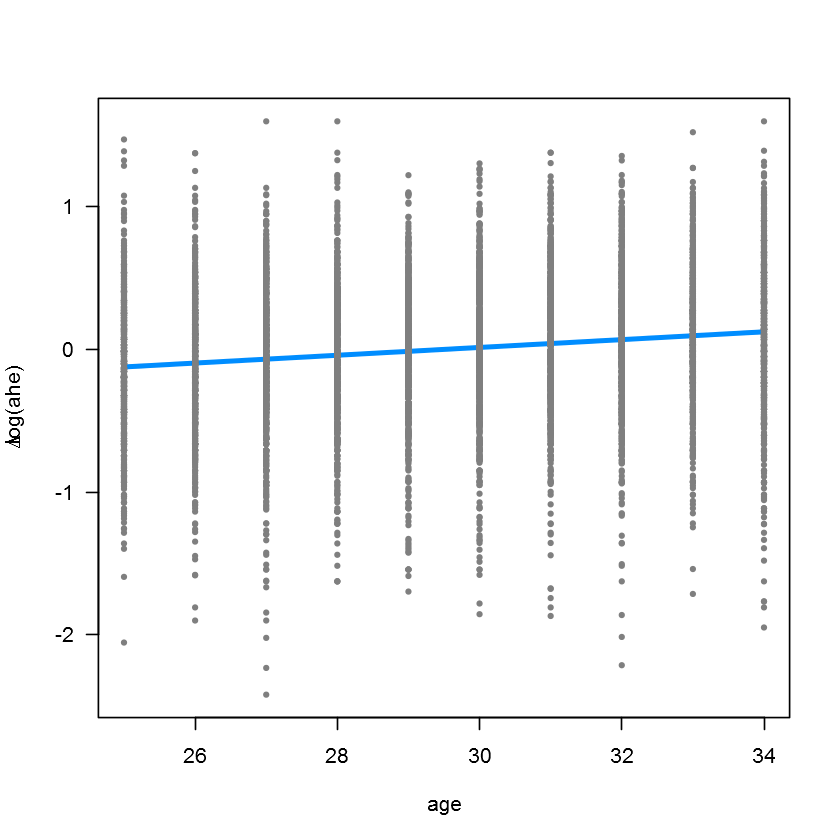

In [24]:
visreg(fit1, "age", type="contrast")



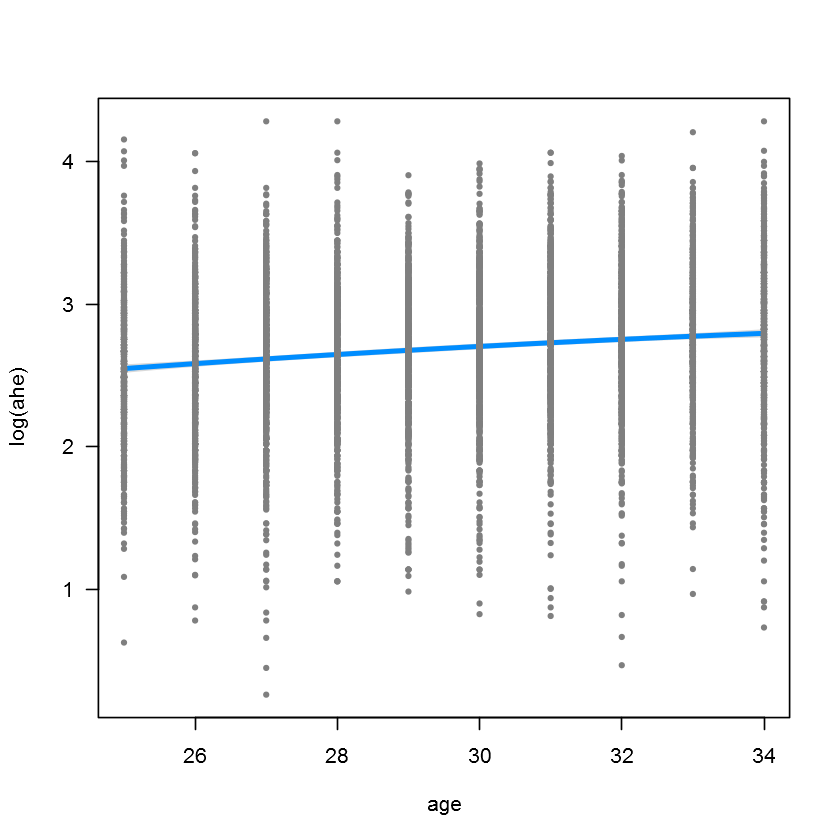

In [25]:
visreg(fit, "age", type="conditional")

In [31]:
library(AER)

#install.packages("AER")
#install.packages("car")

fit3 = lm(log(ahe) ~  age+ I(age^2) +female+bachelor, data=cps08)
linearHypothesis(fit3, c("age=0","I(age^2)=0"), white.adjust="hc0")

Res.Df,Df,F,Pr(>F)
7708,NA,NA,NA
7706,2,109.9049,8.649382e-48


In [30]:
linearHypothesis(fit3, c("age=0","I(age^2)=0"))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
7708,1744.915,NA,NA,NA,NA
7706,1697.681,2,47.23417,107.2011,1.199627e-46


In [ ]:

cps04 <- read_stata("http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/datasets3e/datasets/cps_ch3.dta")
glimpse(cps04)

In [12]:

cps92 <- read_stata("http://wps.pearsoned.co.uk/wps/media/objects/12401/12699039/empirical/empex_tb/cps92_08.dta")
glimpse(cps92)

Observations: 15,316
Variables: 5
$ year     <dbl> 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992...
$ ahe      <dbl> 11.188811, 10.000000, 5.769231, 1.562500, 14.957265, 8.660...
$ bachelor <dbl> 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0...
$ female   <dbl> 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1...
$ age      <dbl> 29, 33, 30, 32, 31, 26, 31, 33, 29, 30, 30, 30, 34, 26, 29...


In [16]:
lm(log(ahe) ~ ., data=cps92)
lm(log(ahe) ~ log(age)+female+bachelor, data=cps92)
lm(log(ahe) ~  age+ I(age^2) +female+bachelor, data=cps92)


Call:
lm(formula = log(ahe) ~ ., data = cps92)

Coefficients:
(Intercept)         year     bachelor       female          age  
  -53.12219      0.02740      0.40503     -0.17577      0.02718  



Call:
lm(formula = log(ahe) ~ log(age) + female + bachelor, data = cps92)

Coefficients:
(Intercept)     log(age)       female     bachelor  
   -0.09107      0.75323     -0.17716      0.44576  



Call:
lm(formula = log(ahe) ~ age + I(age^2) + female + bachelor, data = cps92)

Coefficients:
(Intercept)          age     I(age^2)       female     bachelor  
   0.785516     0.088046    -0.001057    -0.177146     0.445824  


In [ ]:
#http://myweb.uiowa.edu/pbreheny/publications/visreg.pdf
